# Programming Task -- Genetic Algorithm
#### Copyright © 2020 Novita G.
This is my original task without copying from other source. I implemented this code based on my knowledge about GA. 

In [1]:
# Import all needed libraries
import random
import numpy as np
import math 
import statistics
import matplotlib.pyplot as plt

## Procedures/Functions

#### Hyperparameters

In [72]:
# Chromosome length (the bit)
chromosomeLength = 30 # for 1 genotype, means 2*chromosomeLength total in 1 individual
individualLength = 2 * chromosomeLength

# Crossover probability
pCross = 0.95

# Mutation probability
pMutation = 0.035

# Population size
popSize = 200

#### Individual

In [3]:
class Individual:
    def __init__(self, genotype):
        self.genotype = genotype
        self.gen_x1 = genotype[:chromosomeLength]
        self.gen_x2 = genotype[chromosomeLength:]
    
    # For each individual
    def getGenotype(self):
        return self.genotype
    def getGenX1(self):
        return self.gen_x1
    def getGenX2(self):
        return self.gen_x2
    
    # Individual consists of x1 and x2
    def setX1(self, x1): 
        self.x1 = x1
    def setX2(self, x2): 
        self.x2 = x2
    def getX1(self):
        return self.x1
    def getX2(self):
        return self.x2
    
    # Result for each individual
    def setFuncRes(self, res):
        self.res = res
    def getFuncRes(self):
        return self.res
    
    # Fitness for each result
    def setFitness(self, fit):
        self.fit = fit 
    def getFitness(self):
        return self.fit
    
    # Fitness probability
    def setFitnessProb(self, totalFitness):
        self.pFitness = self.fit/totalFitness
    def getFitnessProb(self):
        return self.pFitness

#### Defining Problem
Function to be minimized (sin and cos in radians)

In [4]:
def f(x1, x2):
    return math.cos(x1) * math.sin(x2) - (x1/(x2**2 + 1)) # modify your function here

#### Chromosome Decoding 

In [5]:
# Σ of 2^-i as denominator
def den(chromosomeLength):
    denominator = 0
    for i in range(1, chromosomeLength + 1):
        denominator = denominator + 2**-i
    return denominator 

# Σ of gi * 2^(-i+1)
def genMultiplier(chromosomeLength, genotype):
    multiplier = 0
    for i in range(1, chromosomeLength + 1):
        multiplier = multiplier + genotype[i - 1] * 2**-i
    return multiplier
        
# Genotype to Phenotype
def chromosomeDecode(rmin, rmax, chromosomeLength, genotype):
    return rmin + (rmin + ((rmax - rmin)/den(chromosomeLength) * genMultiplier(chromosomeLength, genotype)))
#     return (rmin + (((rmax - rmin)/ sum([2**(-(i+1)) for i in range(chromosomeLength)])) * sum([(genotype[i]*(2**(-(i+1)))) for i in range(chromosomeLength)])))

#### Generating Population

In [6]:
def generatePop(popSize):
    pop = []
    for i in range(popSize):
        individual = Individual(np.random.randint(2, size=individualLength))
        individual.setX1(chromosomeDecode(-1, 2, chromosomeLength, individual.getGenX1()))
        individual.setX2(chromosomeDecode(-1, 1, chromosomeLength, individual.getGenX2()))
        individual.setFuncRes(f(individual.getX1(), individual.getX2()))
        individual.setFitness(-1 * individual.getFuncRes())
        pop.append(individual)
    return pop

#### Fitness Calculation

In [7]:
# def fitness(functionRes):
#     return 1/(1 + functionRes) # to avoid divide by zero, I added 1

def totalFitness(pops):
    totalFit = 0
    for i in range(len(pops)):
        totalFit += (pops[i].getFitness())
    return totalFit

#### Parent Selection
Here I use Roulette Wheel Selection

In [8]:
def rwsSelection(pops):    
    r = random.uniform(0, 1)
    indv = 1
    while(r > 0 and indv < len(pops) - 1):
        r -= pops[i].getFitnessProb()
        indv += 1
    return indv

#### Cross-Over

In [24]:
def singlePointCrossover(parent1, parent2, crossPoint):
    newParent1 = np.append(parent1[:crossPoint], parent2[crossPoint:])
    newParent2 = np.append(parent2[:crossPoint], parent1[crossPoint:])
#     crossPoint = random.randint(0, individualLength - 1)
    return newParent1, newParent2

def multiPointCrossover(parent1, parent2, crossPoint):
    for i in crossPoint:
        parent1, parent2 = singlePointCrossover(parent1, parent2, i)
    return parent1, parent2

def uniformCrossover(parent1, parent2, crossPoint, pCross): # get reference from https://miro.medium.com/max/416/1*jX0x1w7GA1q3NI32e3rw9Q.png
    for i in range (crossPoint):
        if random.random() < pCross:
            parent1[i], parent2[i] = parent2[i], parent1[i]
        return parent1, parent2

#### Mutation

In [10]:
def mutation(chromosome):
    for i in range(len(chromosome)):
        rand = random.random()
        if rand <= pMutation:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

#### Convergence Validation

In [11]:
def valConv(population):
    valValue = []
    for i in range(len(population)):
        valValue.append(population[i].getFuncRes())
    std = statistics.stdev(valValue)
    if(std <= 0.0000000001):
        return True
    else:
        return False

## Main Program

Generation  1 : 
Best individual:  [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
Generation 1:  [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]  | Generation 2:  [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
x1:  0.35774188801435924  | x2:  -1.3755131181101437
Function calculation result:  -1.0425849760916344
Fitness:  1.0425849760916344
Generation  2 : 
Best individual:  [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
Generation 1:  [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]  | Generation 2:  [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
x1:  0

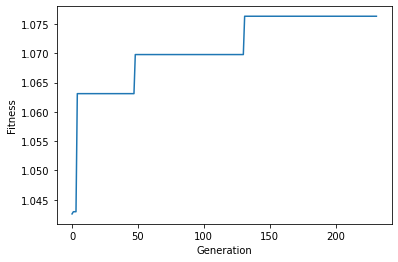

In [73]:
if __name__ == "__main__":
    population = generatePop(popSize)
    totalFit = totalFitness(population)
    
    for i in range(popSize):
        population[i].setFitnessProb(totalFit)
        
    pltFit = []
    gen = 1
    
    while not valConv(population):
        
        newPopulation = []
        
        # Elitism
        newPopulation.append(population[0])        
        newPopulation.append(population[1])        
        
        while len(newPopulation) < len(population):
            idxParent1 = rwsSelection(population)
            idxParent2 = rwsSelection(population)
            
            while(idxParent1 == idxParent2):
                idxParent2 = rwsSelection(population)
        
            parent1 = population[idxParent1].getGenotype()
            parent2 = population[idxParent2].getGenotype()
            
            # Crossover
            
#             crossPoint = np.random.rand(random.randint(0, 10), random.randint(0, 10)) 
#             c1 = lambda: singlePointCrossover(parent1, parent2, crossPoint)
#             c2 = lambda: multiPointCrossover(parent1, parent2, crossPoint)
#             c3 = lambda: uniformCrossover(parent1, parent2, crossPoint)
            
            crossPoint = min(len(parent1), len(parent2))
#             offspring1, offspring2 = random.choice((singlePointCrossover(parent1, parent2, crossPoint), multiPointCrossover(parent1, parent2, crossPoint), uniformCrossover(parent1, parent2, crossPoint)))
            offspring1, offspring2 = uniformCrossover(parent1, parent2, crossPoint, pCross)
            
            # Mutation
            offspring1 = mutation(offspring1)            
            offspring2 = mutation(offspring2)            
            
            indvO1 = Individual(offspring1)
            indvO1.setX1(chromosomeDecode(-1, 2, chromosomeLength, indvO1.getGenX1()))
            indvO1.setX2(chromosomeDecode(-1, 2, chromosomeLength, indvO1.getGenX2()))
            indvO1.setFuncRes(f(indvO1.getX1(), indvO1.getX2()))
            indvO1.setFitness(-1 * indvO1.getFuncRes())
            
            indvO2 = Individual(offspring1)
            indvO2.setX1(chromosomeDecode(-1, 1, chromosomeLength, indvO2.getGenX1()))
            indvO2.setX2(chromosomeDecode(-1, 1, chromosomeLength, indvO2.getGenX2()))
            indvO2.setFuncRes(f(indvO2.getX1(), indvO1.getX2()))
            indvO2.setFitness(-1 * indvO2.getFuncRes())
            
            newPopulation.append(indvO1)
            newPopulation.append(indvO2)
            
        pops = population + newPopulation
        
        # Sort by fitness
        pops.sort(key=lambda x: x.fit, reverse=True)
        
        # Next generation
        population = []
        for i in range(popSize):
            population.append(pops[i])
            
        totalFit = totalFitness(population)
        for i in range(len(population)):
            population[i].setFitnessProb(totalFit)
            
        # The best individual in current generation        
        bestIndv = np.array(population[0].getGenotype()).tolist()
        gen1 = np.array(population[0].getGenX1()).tolist()
        gen2 = np.array(population[0].getGenX2()).tolist()
        
        print("Generation ", gen, ": ")
        print("Best individual: ", bestIndv)
        print("Generation 1: ", gen1, " | Generation 2: ", gen2)
        print("x1: ", population[0].getX1(), " | x2: ", population[0].getX2())
        print("Function calculation result: ", population[0].getFuncRes())
        print("Fitness: ", population[0].getFitness())
        
        pltFit.append(population[0].getFitness())
        
        gen += 1
    
    plt.plot(pltFit)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()

### NOTES: 
If you fail to run the last cell, try interrupting the kernel first, and then run it again. I think it happens because there is a problem when getting random integer, maybe it is out of bounds of array.

## References

- https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.375.543&rep=rep1&type=pdf
- https://arxiv.org/pdf/1308.4675.pdf
- https://www.uio.no/studier/emner/matnat/ifi/INF3490/h15/lectures/lecture3-inf3490-evolalg2-ho-1pp.pdf
- https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_mutation.htm
- https://www.researchgate.net/publication/254740121_A_grouping_genetic_algorithm_for_the_multi-objective_cell_formation_problem
- http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.695.5621&rep=rep1&type=pdf
- https://www.whitman.edu/Documents/Academics/Mathematics/2014/carrjk.pdf